In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

##for multiple files
folderDirectory = r'./Input/articles/'
all_files = glob.glob(folderDirectory + "/*.xls")

li = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)
    df['File']=filename
    df['File']=df['File'].str.split('\\').str[1]

rawData = pd.concat(li, axis=0, ignore_index=True)

In [2]:
path_df = "./Pickles/articles.pickle"

with open(path_df, 'rb') as data:
    rawData = pickle.load(data)

In [3]:
proceessedData = rawData

In [4]:
article_text = proceessedData[['article']]
article_text.head()

,article
0,SINGAPORE - A man's body was found on the grou...
1,London (AFP) - Thai Formula One driver Alexand...
2,SINGAPORE - The Straits Times bagged eight awa...
3,Ready for a challenge? Try out daily Sudoku an...
4,HONG KONG (BLOOMBERG) – Hong Kong airport auth...


# Data Exploration

In [5]:
article_text['length'] = article_text['article'].apply(len)
article_text.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,article,length
0,SINGAPORE - A man's body was found on the grou...,581
1,London (AFP) - Thai Formula One driver Alexand...,1208
2,SINGAPORE - The Straits Times bagged eight awa...,4026
3,Ready for a challenge? Try out daily Sudoku an...,400
4,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,7814


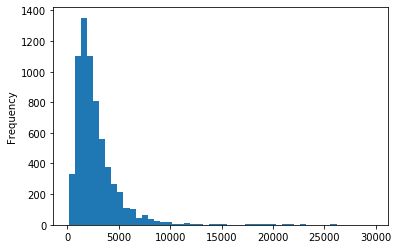

In [6]:
article_text['length'].plot(bins=50, kind='hist') 

# Data Cleaning

The following data cleaning was performed.
<ol>
    <li>Convert all articles to lower case</li>
    <li>Remove special breakline characters</li>
    <li>Removal of Stopwords</li>
    <li>Lemmatization of text</li>
</ol>

In [7]:
article_text['article']=article_text['article'].str.lower()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
article_text['article'][0]

0    singapore - a man's body was found on the grou...
0    the nanyang technological university (ntu) is ...
0    bangkok: thailand plans to distribute about 10...
Name: article, dtype: object

In [9]:
article_text['article']=article_text['article'].str.replace("\n", " ")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
article_text['article'][0]

0    singapore - a man's body was found on the grou...
0    the nanyang technological university (ntu) is ...
0    bangkok: thailand plans to distribute about 10...
Name: article, dtype: object

## Stopwords Removal

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = list(stopwords.words('english'))

In [13]:
from nltk.corpus import stopwords
stop_words[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def process_text(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc=mess.replace(r'[^\w\s]+', '')

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stop_words]

In [15]:
article_text['article'].head(5).apply(process_text)

0    [singapore, -, man's, body, found, ground, flo...
1    [london, (afp), -, thai, formula, one, driver,...
2    [singapore, -, straits, times, bagged, eight, ...
3    [ready, challenge?, try, daily, sudoku, crossw...
4    [hong, kong, (bloomberg), –, hong, kong, airpo...
Name: article, dtype: object

# Text Representation

## Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(article_text['article'])
print(len(bow_transformer.vocabulary_))

120455


In [18]:
message4 = article_text['article'][3]
print(message4)

3    ready for a challenge? try out daily sudoku an...
3    an argument in a whatsapp group chat led to a ...
3    yangon: raids on jungle drug labs have been me...
Name: article, dtype: object


In [19]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 143)	1
  (0, 1332)	2
  (0, 1441)	1
  (0, 5930)	1
  (0, 8010)	1
  (0, 8529)	7
  (0, 8840)	1
  (0, 8948)	1
  (0, 9328)	1
  (0, 9340)	1
  (0, 11167)	1
  (0, 11460)	1
  (0, 11656)	1
  (0, 12220)	1
  (0, 12286)	1
  (0, 12564)	2
  (0, 13199)	1
  (0, 13783)	1
  (0, 14874)	1
  (0, 15313)	1
  (0, 16379)	1
  (0, 16465)	2
  (0, 16534)	1
  (0, 16623)	1
  (0, 16835)	1
  :	:
  (0, 112108)	1
  (0, 112474)	1
  (0, 112485)	1
  (0, 112829)	1
  (0, 113456)	2
  (0, 113981)	1
  (0, 114067)	2
  (0, 114531)	1
  (0, 115031)	1
  (0, 115084)	1
  (0, 115190)	1
  (0, 115384)	1
  (0, 115519)	1
  (0, 115645)	1
  (0, 116322)	1
  (0, 116540)	1
  (0, 116688)	2
  (0, 116804)	2
  (0, 116813)	1
  (0, 117189)	2
  (0, 117265)	1
  (0, 117355)	1
  (0, 117413)	1
  (0, 117515)	1
  (0, 117776)	1
(1, 120455)


In [20]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

#photography
11.18


In [21]:
messages_bow = bow_transformer.transform(article_text['article'])

In [22]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (6608, 120455)
Amount of Non-Zero occurences:  1373166


Bag of Words methods will be used

## TD-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 117776)	0.04445659805848013
  (0, 117515)	0.039060835559209195
  (0, 117413)	0.020019697130673007
  (0, 117355)	0.014539938960929864
  (0, 117265)	0.040864174571517434
  (0, 117189)	0.10940097816514954
  (0, 116813)	0.011306419621946489
  (0, 116804)	0.04676021699803271
  (0, 116688)	0.041617471126754284
  (0, 116540)	0.045662435299420746
  (0, 116322)	0.018333273189017188
  (0, 115645)	0.033874760596229424
  (0, 115519)	0.021205807068228593
  (0, 115384)	0.015854551433403936
  (0, 115190)	0.04029145236121106
  (0, 115084)	0.041840756513862785
  (0, 115031)	0.029852128338479052
  (0, 114531)	0.035008011544220445
  (0, 114067)	0.0717183889299477
  (0, 113981)	0.031253398578057034
  (0, 113456)	0.05566050975590387
  (0, 112829)	0.023839296305536384
  (0, 112485)	0.017220048872634387
  (0, 112474)	0.017805707654227974
  (0, 112108)	0.04919446596605558
  :	:
  (0, 16835)	0.01724949055349175
  (0, 16623)	0.018541866264791478
  (0, 16534)	0.039768597947825085
  (0, 16465)	0.04200798429

In [24]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

4.056394723291218


In [25]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(6608, 120455)


In [26]:
messages_tfidf

<6608x120455 sparse matrix of type '<class 'numpy.float64'>'
	with 1373166 stored elements in Compressed Sparse Row format>

# TfidfVectorizer

In [27]:
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(article_text['article'])

In [28]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
the,0.282083
man,0.222316
block,0.209365
found,0.193543
she,0.189731
police,0.188297
677,0.184313
chute,0.181177
05pm,0.163480
cordoned,0.162138


In [29]:
# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(messages_tfidf, output)

In [30]:
proceessedData

,article,category,Category_Code
0,SINGAPORE - A man's body was found on the grou...,Singapore,3
1,London (AFP) - Thai Formula One driver Alexand...,Sport,4
2,SINGAPORE - The Straits Times bagged eight awa...,Singapore,3
3,Ready for a challenge? Try out daily Sudoku an...,Lifestyle,0
4,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,World,2
5,HONG KONG - A meal at Dragon Centre mall has b...,World,2
6,SINGAPORE - Six flights from Singapore to Hong...,Singapore,3
7,"HONG KONG (AGENCE FRANCE-PRESSE, REUTERS) - Ch...",World,2
8,MERSING - Malaysian authorities on Monday (Aug...,Singapore,3
9,Can't Be Tamed singer Miley Cyrus will not be ...,Lifestyle,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(proceessedData['article'], proceessedData['Category_Code'], test_size=0.3, random_state=8)

In [32]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [34]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
training_features = tfidf.fit_transform(X_train).toarray()
training_labels = y_train
print(training_features.shape)

test_features = tfidf.transform(X_test).toarray()
test_labels = y_test
print(test_features.shape)

(4625, 300)
(1983, 300)


In [35]:
#Training Features
with open('Pickles/training_features.pickle', 'wb') as output:
    pickle.dump(training_features, output)
    
#Training Labels
with open('Pickles/training_labels.pickle', 'wb') as output:
    pickle.dump(training_labels, output)
    
#Test Features
with open('Pickles/test_features.pickle', 'wb') as output:
    pickle.dump(test_features, output)
    
#Test Labels
with open('Pickles/test_labels.pickle', 'wb') as output:
    pickle.dump(test_labels, output)